In [343]:
import pandas as pd
import numpy as np
import glob
pd.options.mode.chained_assignment = None  # default='warn', Mutes warnings when copying a slice from a DataFrame.
#Import all functions from the Labs and helpers
#from helpers import *
#from plots import *
%load_ext autoreload
%autoreload 2

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline 

from proj1_helpers import *
from ML_func import *
from plots import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Import data

In [326]:
# Load the training data into feature matrix, class labels, and event ids:
y, X, ids = load_csv_data('train.csv')
ytest, Xtest, idstest = load_csv_data('test.csv')

In [327]:
#pd.DataFrame(X)
#pd.DataFrame(Xtest)

### Data Exploration

In [328]:
#trainSet = pd.read_csv("train.csv")


In [329]:
#T0 = trainSet.loc[trainSet['PRI_jet_num'] == 0]

In [330]:
#T1 = trainSet.loc[trainSet['PRI_jet_num'] == 1]


In [331]:
#T2 = trainSet.loc[trainSet['PRI_jet_num'] == 2]

In [332]:
#T3 = trainSet.loc[trainSet['PRI_jet_num'] == 3]


### Clean the Data

- yi and Xi will be the data where we just replace the missing value in the first column by the median
- yi_r and Xi_r will be the data where we just remove the entire row if a value was missing in the first column

In [344]:
# Split the data according to the label of the feature 22

def findIndLabel(A, label, column):
    N = A.shape[0]
    ind = []
    
    for i in range(N):
        if A[i,22] == label:
            ind.append(i)
            
    return ind

ind_lab0 = findIndLabel(X, 0, 22)
ind_lab1 = findIndLabel(X, 1, 22)
ind_lab2 = findIndLabel(X, 2, 22)
ind_lab3 = findIndLabel(X, 3, 22)

ind_lab0_test = findIndLabel(Xtest, 0, 22)
ind_lab1_test = findIndLabel(Xtest, 1, 22)
ind_lab2_test = findIndLabel(Xtest, 2, 22)
ind_lab3_test = findIndLabel(Xtest, 3, 22)
    

# ------------ TRAINING ----------------------------------
y0, y0_r, ids0 = y[np.where(X[:,22]==0)], y[np.where(X[:,22]==0)], ids[ind_lab0]
y1, y1_r, ids1 = y[np.where(X[:,22]==1)], y[np.where(X[:,22]==1)], ids[ind_lab1]
y2, y2_r, ids2 = y[np.where(X[:,22]==2)], y[np.where(X[:,22]==2)], ids[ind_lab2]
y3, y3_r, ids3 = y[np.where(X[:,22]==3)], y[np.where(X[:,22]==3)], ids[ind_lab3]

X0, X0_r = X[np.where(X[:,22]==0)], X[np.where(X[:,22]==0)]
X1, X1_r = X[np.where(X[:,22]==1)], X[np.where(X[:,22]==1)]
X2, X2_r = X[np.where(X[:,22]==2)], X[np.where(X[:,22]==2)]
X3, X3_r = X[np.where(X[:,22]==3)], X[np.where(X[:,22]==3)]

# ------------ TESTING ------------------------------------------------------------
y0test, y0test_r, ids0test = ytest[np.where(Xtest[:,22]==0)], ytest[np.where(Xtest[:,22]==0)], idstest[ind_lab0_test]
y1test, y1test_r, ids1test = ytest[np.where(Xtest[:,22]==1)], ytest[np.where(Xtest[:,22]==1)], idstest[ind_lab1_test]
y2test, y2test_r, ids2test = ytest[np.where(Xtest[:,22]==2)], ytest[np.where(Xtest[:,22]==2)], idstest[ind_lab2_test]
y3test, y3test_r, ids3test = ytest[np.where(Xtest[:,22]==3)], ytest[np.where(Xtest[:,22]==3)], idstest[ind_lab3_test]


X0test, X0test_r = Xtest[np.where(Xtest[:,22]==0)], Xtest[np.where(Xtest[:,22]==0)]
X1test, X1test_r = Xtest[np.where(Xtest[:,22]==1)], Xtest[np.where(Xtest[:,22]==1)]
X2test, X2test_r = Xtest[np.where(Xtest[:,22]==2)], Xtest[np.where(Xtest[:,22]==2)]
X3test, X3test_r = Xtest[np.where(Xtest[:,22]==3)], Xtest[np.where(Xtest[:,22]==3)]

In [345]:
# Replace the missing values -999 in the first column by the median

# ------------ TRAINING ----------------------------------
X0[np.where(X0[:,0]==-999),0] = np.median(X0[X0[:,0]!=-999,0])
X1[np.where(X1[:,0]==-999),0] = np.median(X1[X1[:,0]!=-999,0])
X2[np.where(X2[:,0]==-999),0] = np.median(X2[X2[:,0]!=-999,0])
X3[np.where(X3[:,0]==-999),0] = np.median(X3[X3[:,0]!=-999,0])

# ------------ TESTING ------------------------------------------------------------
X0test[np.where(X0test[:,0]==-999),0] = np.median(X0test[X0test[:,0]!=-999,0])
X1test[np.where(X1test[:,0]==-999),0] = np.median(X1test[X1test[:,0]!=-999,0])
X2test[np.where(X2test[:,0]==-999),0] = np.median(X2test[X2test[:,0]!=-999,0])
X3test[np.where(X3test[:,0]==-999),0] = np.median(X3test[X3test[:,0]!=-999,0])

# Remove the rows where there are -999 in the first column
def findInd(A):
    n_f = A.shape[0]
    ind = []
    for i in range(n_f):
        if A[i,0]==-999 :
            ind.append(i)
    
    return ind

# ------------ TRAINING ----------------------------------
ind_0 = findInd(X0_r)
ind_1 = findInd(X1_r)
ind_2 = findInd(X2_r)
ind_3 = findInd(X3_r)

y0_r, X0_r, ids0_r = np.delete(y0_r, ind_0, 0), np.delete(X0_r, ind_0, 0), ids0[ind_0]
y1_r, X1_r, ids1_r = np.delete(y1_r, ind_1, 0), np.delete(X1_r, ind_1, 0), ids1[ind_1]
y2_r, X2_r, ids2_r = np.delete(y2_r, ind_2, 0), np.delete(X2_r, ind_2, 0), ids2[ind_2]
y3_r, X3_r, ids3_r = np.delete(y3_r, ind_3, 0), np.delete(X3_r, ind_3, 0), ids3[ind_3]


# ------------ TESTING ------------------------------------------------------------
ind_0_test = findInd(X0test_r)
ind_1_test = findInd(X1test_r)
ind_2_test = findInd(X2test_r)
ind_3_test = findInd(X3test_r)

y0test_r, X0test_r, ids0test_r = np.delete(y0test_r, ind_0_test, 0), np.delete(X0test_r, ind_0_test, 0), ids0test[ind_0_test]
y1test_r, X1test_r, ids1test_r = np.delete(y1test_r, ind_1_test, 0), np.delete(X1test_r, ind_1_test, 0), ids1test[ind_1_test]
y2test_r, X2test_r, ids2test_r = np.delete(y2test_r, ind_2_test, 0), np.delete(X2test_r, ind_2_test, 0), ids2test[ind_2_test]
y3test_r, X3test_r, ids3test_r = np.delete(y3test_r, ind_3_test, 0), np.delete(X3test_r, ind_3_test, 0), ids3test[ind_3_test]

In [346]:
# Given a matrix, check if there are -999 values
def checkMissingValue(A):
    n_f = A.shape[1]
    flag = False
    
    for i in range(n_f):
        #print("{}:{}".format(i,len(np.where(A[:,i]==-999)[0])))
        if len(np.where(A[:,i]==-999)[0]) is not 0:
            flag = True
            
    return flag

def deleteMissingValues(A):
    n_f = A.shape[1]
    ind = []
    for i in range(n_f):
        inner_length = len(A[:,i])
        if (i == 22) or (len(np.where(A[:,i]==-999)[0]) != 0) or (len(np.where(A[:,i]==0)[0]) == inner_length) :
            ind.append(i)
        
    return np.delete(A,ind,1) 

In [347]:
# Remove completely the columns with -999

# ------------ TRAINING ----------------------------------
X0, X0_r = deleteMissingValues(X0), deleteMissingValues(X0_r)
X1, X1_r = deleteMissingValues(X1), deleteMissingValues(X1_r)
X2, X2_r = deleteMissingValues(X2), deleteMissingValues(X2_r)
X3, X3_r = deleteMissingValues(X3), deleteMissingValues(X3_r)

# ------------ TESTING ----------------------------------
X0test, X0test_r = deleteMissingValues(X0test), deleteMissingValues(X0test_r)
X1test, X1test_r = deleteMissingValues(X1test), deleteMissingValues(X1test_r)
X2test, X2test_r = deleteMissingValues(X2test), deleteMissingValues(X2test_r)
X3test, X3test_r = deleteMissingValues(X3test), deleteMissingValues(X3test_r)

In [348]:
# Sanity Check
#pd.DataFrame(X0)
#pd.DataFrame(X0_r)
#pd.DataFrame(X1)
#pd.DataFrame(X1_r)
#pd.DataFrame(X2)
#pd.DataFrame(X2_r)
#pd.DataFrame(X3)
#pd.DataFrame(X3_r)

#pd.DataFrame(y0)
#pd.DataFrame(ids0)
#pd.DataFrame(y0_r)
#pd.DataFrame(y1)
#pd.DataFrame(y1_r)
#pd.DataFrame(y2_r)
#pd.DataFrame(y2_r)
#pd.DataFrame(y3)
#pd.DataFrame(y3_r)
#pd.DataFrame(ids0)

In [349]:
# Group the data

# ------------ TRAINING ----------------------------------
train1 = [y0, X0, ids0]
train2 = [y1, X1, ids1]
train3 = [y2, X2, ids2]
train4 = [y3, X3, ids3]
train5 = [y0_r, X0_r, ids0_r]
train6 = [y1_r, X1_r, ids1_r]
train7 = [y2_r, X2_r, ids2_r]
train8 = [y3_r, X3_r, ids3_r]

models1 = [train1, train2, train3, train4]
models2 = [train5, train6, train7, train8]


# ------------ TESTING ----------------------------------
train1_test = [y0test, X0test, ids0test]
train2_test = [y1test, X1test, ids1test]
train3_test = [y2test, X2test, ids2test]
train4_test = [y3test, X3test, ids3test]
train5_test = [y0test_r, X0test_r, ids0test_r]
train6_test = [y1test_r, X1test_r, ids1test_r]
train7_test = [y2test_r, X2test_r, ids2test_r]
train8_test = [y3test_r, X3test_r, ids3test_r]

models_test1 = [train1_test, train2_test, train3_test, train4_test]
models_test2 = [train5_test, train6_test, train7_test, train8_test]

### Build polynomial X with cross term, log(|x| + 1) and sqrt(x)

- Attention ça prend une chiée de temps !!!

In [350]:
test = np.array([[1,2,3],[4,5,6]])
np.sqrt(test)

array([[ 1.        ,  1.41421356,  1.73205081],
       [ 2.        ,  2.23606798,  2.44948974]])

In [351]:
# Build Poly
degree = 12

print("Build for training set")
for i in range(len(models1)):
    print(i)
    
    models1[i][1] = build_log_sqrt_comb_poly(models1[i][1], degree)

print("Build for testing set")
for i in range(len(models_test1)):
    print(i)
    
    models_test1[i][1] = build_log_sqrt_comb_poly(models_test1[i][1], degree)

Build for training set
0
1
2
3
Build for testing set
0
1
2
3


### Build polynomial X with cross term and with log(|x| + 1)

- Attention ça prend une chiée de temps !!!

In [292]:
# Build Poly
degree = 12

print("Build for training set")
for i in range(len(models1)):
    print(i)
    
    models1[i][1] = build_log_comb_poly(models1[i][1], degree)

print("Build for testing set")
for i in range(len(models_test1)):
    print(i)
    
    models_test1[i][1] = build_log_comb_poly(models_test1[i][1], degree)

Build for training set
0
1
2
3
Build for testing set
0
1
2
3


### Build polynomial X with log(|x| + 1)

In [261]:
# Build Poly
degree = 10

print("Build for training set")
for i in range(len(models1)):
    print(i)
    
    models1[i][1] = build_log_poly(models1[i][1], degree)

print("Build for testing set")
for i in range(len(models_test1)):
    print(i)
    
    models_test1[i][1] = build_log_poly(models_test1[i][1], degree)

Build for training set
0
1
2
3
Build for testing set
0
1
2
3


### Standardization

In [352]:
# Standardize the matrix of experience
print("Standardize for training set")
for i in range(len(models1)):
    print(i)
    
    n = models1[i][1].shape[0]
    models1[i][1] = np.delete(models1[i][1],0,1)
    models1[i][1] = standardize(models1[i][1])
    add = np.ones(n)
    models1[i][1] = np.column_stack((add, models1[i][1]))
    
print("Standardize for testing set")   
for i in range(len(models_test1)):
    print(i)
    
    n = models_test1[i][1].shape[0]
    models_test1[i][1] = np.delete(models_test1[i][1],0,1)
    models_test1[i][1] = standardize(models_test1[i][1])
    add = np.ones(n)
    models_test1[i][1] = np.column_stack((add, models_test1[i][1]))

Standardize for training set
0
1
2
3
Standardize for testing set
0
1
2
3


### Bias-Variance Analysis and K-Fold Cross Validation

- Attention ça prend une chiée de temps !

In [300]:
def bias_variance_demo(y, x, d, lambda_, ratio = 0.005):
    
    # define parameters
    seeds = range(5)
    num_data = 10000
    ratio_train = ratio
    degrees = range(1, d+1)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        print("seed number : {}".format(index_seed))
        np.random.seed(seed)
        
        x_tr, x_te, y_tr, y_te = split_data(x, y, ratio_train, seed)

        
        # Loop through the different degrees for the polynomial and find the error
        for index_degree, degree in enumerate(degrees):
            print("degree {}".format(degree))
            # form polynomial data
            X_tr = build_log_comb_poly(x_tr, degree)
            X_te = build_log_comb_poly(x_te, degree)
            # least square
            w = ridge_regression(y_tr, X_tr, lambda_)
            # calculate the rmse for train and test
            rmse_tr[index_seed, index_degree] = np.sqrt(2 * calculate_mse(y_tr, X_tr, w))
            rmse_te[index_seed, index_degree] = np.sqrt(2 * calculate_mse(y_te, X_te, w))
   
    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)
    
bias_variance_demo(train1[0], train1[1], 15, 0.01)

seed number : 0
degree 1


KeyboardInterrupt: 

lambda: 0.0001
0
1
lambda: 0.001
0
1
lambda: 0.01
0
1
lambda: 0.1
0
1
lambda: 1.0
0
1


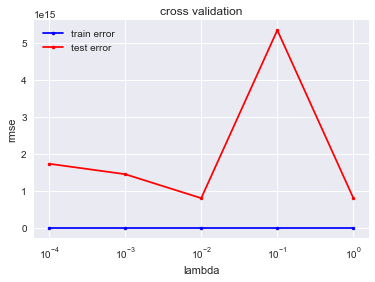

In [39]:
def cross_validation_demo(y, x, deg, k):
    seed = 1
    degree = deg
    k_fold = k
    lambdas = np.logspace(-4, 0, 5)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    
    # Do the K-Fold cross validation:
    
    # Loop through the lambas
    for lambda_ in lambdas:
        print("lambda: {}".format(lambda_))
        # Create temporary arrays to hold the RMSE
        rmse_tr_tmp = []
        rmse_te_tmp = []
        # Do the K-Fold cross val
        for k in range(k_fold):
            print(k)
            loss_tr, loss_te = cross_validation(y, x, k_indices, k_fold, k, lambda_, degree)
            rmse_tr_tmp.append(loss_tr)
            rmse_te_tmp.append(loss_te)
        rmse_tr.append(np.mean(rmse_tr_tmp))
        rmse_te.append(np.mean(rmse_te_tmp))
    
    # ***************************************************    
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)

cross_validation_demo(train1[0], train1[1], 10, 2)

In [320]:
# Compute regression
W = []
for i in range(len(models1)):
    w = least_squares(models1[i][0], models1[i][1])
    W.append(w)

In [353]:
# Compute ridge regression
W = []
for i in range(len(models1)):
    w = ridge_regression(models1[i][0], models1[i][1], 10**(-2))
    W.append(w)

In [354]:
# Find predictions
Y_preds = []

for i in range(len(models_test1)):
    y = predict_labels(W[i], models_test1[i][1])
    Y_preds.append(y)

In [355]:
Y_pred = np.concatenate((Y_preds[0], Y_preds[1], Y_preds[2], Y_preds[3]), axis=0)
ids_pred = np.concatenate((models_test1[0][2], models_test1[1][2], models_test1[2][2], models_test1[3][2]), axis=0)

In [356]:
pred = np.column_stack((ids_pred, Y_pred))
# Sort by IDS
pred = pred[np.argsort(pred[:, 0])]
pred[:,0]

array([ 350000.,  350001.,  350002., ...,  918235.,  918236.,  918237.])

In [357]:
create_csv_submission(pred[:,0], pred[:,1], "predictions.csv")